# Predicting Heart Disease Using Logistic Regression 

Objective: Heart disease can come from a variety of factors and being able to predict the onset of heart disease can lead to preventative intervention. 

In this case study, we will be using the UCI Machine Learning Repository to view a dataset that classifies whether a patient has heart disease and make a model that can predict future instances. 

In [1]:
#Importing libraries 

import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression

#Reading csv into df 

heart = pd.read_csv('heart_disease.csv')

Here is the data dictionary for our features and target variable from UCI's website: 

| **Feature** | **Role**| **Type**    |  **Description**                                                            |**Units**|**Missing Vals?**|
|----------|---------|-------------|-----------------------------------------------------------------------------|-------|---------------|
| age      | Feature | Integer     | Age of patient                                                          | years | no            |
| sex      | Feature | Categorical | Sex of patient                                            |       | no            |
|          |         |             | 0 = female; 1 = male                                                        |       |               |
| cp       | Feature | Categorical | Chest pain type                                                             |       | no            |
|          |         |             | 1 = typical angina; 2= atypical angina; 3= non-anginal pain; 4=asymptomatic |       |               |
| trestbps | Feature | Integer     | Resting blood pressure (on admission to the hospital)                       | mm Hg | no            |
| chol     | Feature | Integer     | Serum cholestorol                                                           | mg/dl | no            |
| fbs      | Feature | Categorical | fasting blood sugar > 120 mg/dl                                             |       | no            |
|          |         |             | 0 = false; 1 = true                                                         |       |               |
| restecg  | Feature | Categorical | resting electrocardiographic results                                        |       | no            |
|          |         |             | 0 = normal; 1 = ST-T wave abnormality; 2 = probable or definite left ventricular hypertrophy     |       |               |
| thalach  | Feature | Integer     | maximum heart rate achieved                                                 |       | no            |
| exang    | Feature | Categorical | exercise induced angina                                                     |       | no            |
|          |         |             | 0 = no; 1 = yes                                                             |       |               |
| oldpeak  | Feature | Integer     | ST depression induced by exercise relative to rest                          |       | no            |
| slope    | Feature | Categorical | the slope of the peak exercise ST segment                                   |       | no            |
|          |         |             | 1 = upsloping; 2 = flat; 3 = downsloping                                    |       | no            |
| ca       | Feature | Integer     | number of major vessels (0-3) colored by flourosopy                         |       | yes           |
| thal     | Feature | Categorical | Thalassemia which is an inherited blood disorder that causes your body to have less hemoglobin than normal               |       | yes           |
|          |         |             | 3 = normal; 6 = fixed defect; 7 = reversable defect                         |       |               |
| present  | Target  | Integer     | diagnosis of heart disease                                                  |       | no            |


In [2]:
#Exploratory analytics 
print(heart.head())
print(f'Number of features: {heart.shape[1]}')
print(f'Number of observations: {heart.shape[0]}')
print(heart.dtypes)

   Unnamed: 0  age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  \
0           1   63    1   1       145   233    1        2      150      0   
1           2   67    1   4       160   286    0        2      108      1   
2           3   67    1   4       120   229    0        2      129      1   
3           4   37    1   3       130   250    0        0      187      0   
4           5   41    0   2       130   204    0        2      172      0   

   oldpeak  slope   ca thal  present  
0      2.3      3  0.0  6.0        0  
1      1.5      2  3.0  3.0        1  
2      2.6      2  2.0  7.0        1  
3      3.5      3  0.0  3.0        0  
4      1.4      1  0.0  3.0        0  
Number of features: 15
Number of observations: 303
Unnamed: 0      int64
age             int64
sex             int64
cp              int64
trestbps        int64
chol            int64
fbs             int64
restecg         int64
thalach         int64
exang           int64
oldpeak       float64
slope     

We see the columns from our imported dataset has two features, ca and thal, that were imported as strings but we are going to change them to numeric columns, so we can observe their relationships to the presence of heart disease. If there are missing values, we will replace them with the mean of the specified column so we don't skew the data.

In [3]:
heart['thal'] = pd.to_numeric(heart['thal'], errors = 'coerce')

#Looks like we have missing values 

# Calculate the mean of the 'thal' column
thal_mean = heart['thal'].mean()

# Replace missing values with the mean
heart['thal'] = heart['thal'].fillna(thal_mean)

heart['ca'] = pd.to_numeric(heart['ca'], errors = 'coerce')

# Calculate the mean of the 'ca' column
ca_mean = heart['ca'].mean()

# Replace missing values with the mean
heart['ca'] = heart['ca'].fillna(thal_mean)

print(heart.describe())
print(heart.isna().sum())

       Unnamed: 0         age         sex          cp    trestbps        chol  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean   152.000000   54.438944    0.679868    3.158416  131.689769  246.693069   
std     87.612784    9.038662    0.467299    0.960126   17.599748   51.776918   
min      1.000000   29.000000    0.000000    1.000000   94.000000  126.000000   
25%     76.500000   48.000000    0.000000    3.000000  120.000000  211.000000   
50%    152.000000   56.000000    1.000000    3.000000  130.000000  241.000000   
75%    227.500000   61.000000    1.000000    4.000000  140.000000  275.000000   
max    303.000000   77.000000    1.000000    4.000000  200.000000  564.000000   

              fbs     restecg     thalach       exang     oldpeak       slope  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.148515    0.990099  149.607261    0.326733    1.039604    1.600660   
std      0.356198    0.9949

Now that our features are the right data type and we have resolved issues of missing data, we are going to examine our target to ensure it has both cases (presence of heart disease) and non-cases (no presence of heart disease) using a histogram. 

<AxesSubplot:>

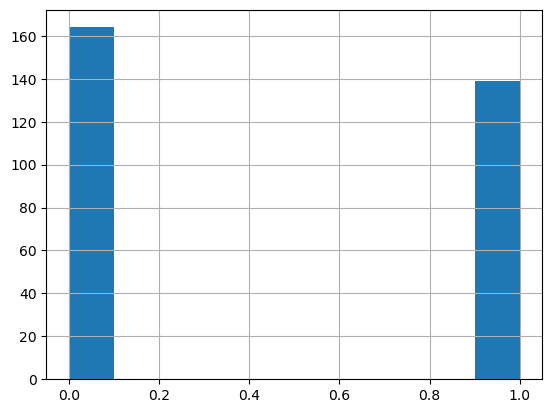

In [4]:
#The present column is our column of interest 
heart['present'].hist()

We see based on the column above we have examples of both cases and non-cases. Therefore, we can move on. 

Now let's say when we group the dataset by heart disease if there are any notable differences between the means of each feature between the case and non-case group. Additionally, let's say if we can determine any distinctive relationships using Pearson's correlation between each feature and the target variable. We can do this using a heatmap.

In [5]:
heart.groupby("present").mean().reset_index()

,present,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0,148.073171,52.585366,0.560976,2.792683,129.250000,242.640244,0.140244,0.835366,158.378049,0.140244,0.586585,1.408537,0.354894,3.803257
1,1,156.633094,56.625899,0.820144,3.589928,134.568345,251.474820,0.158273,1.172662,139.258993,0.546763,1.574101,1.827338,1.163556,5.832620


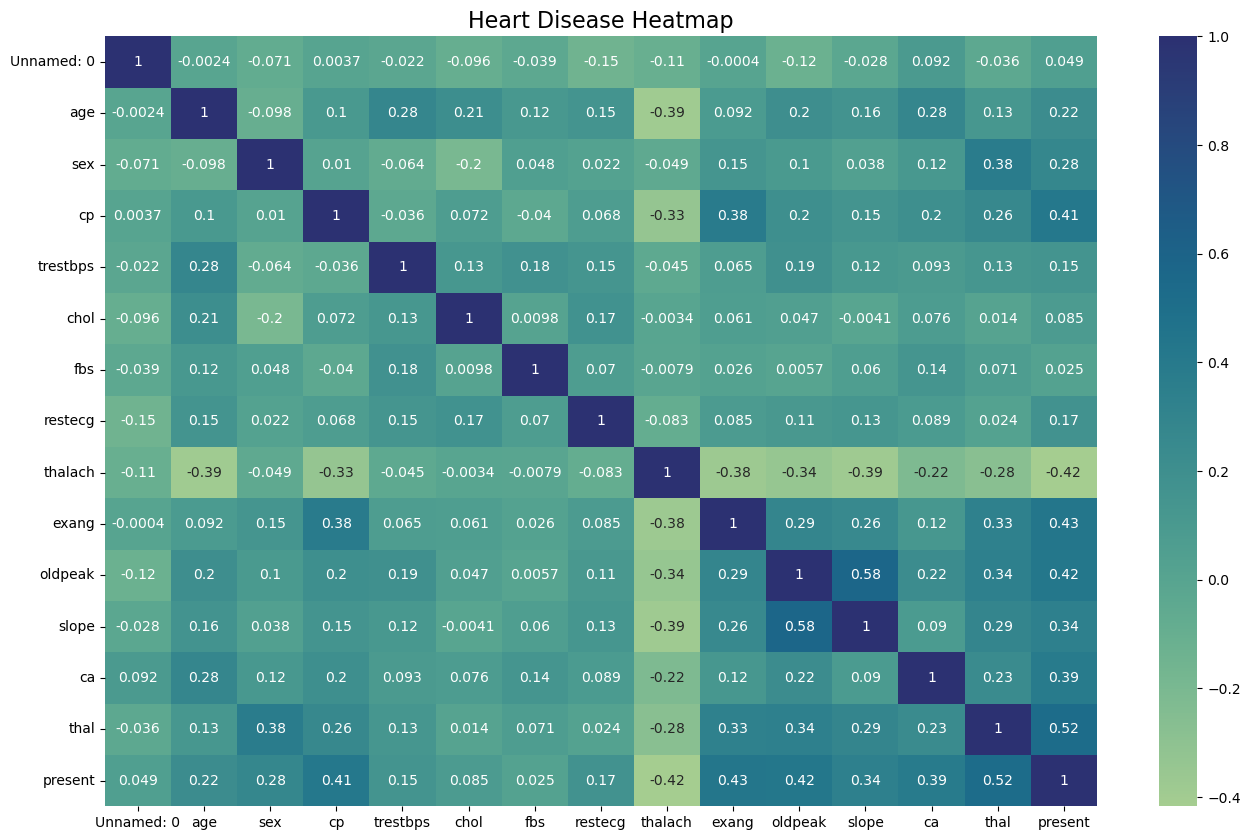

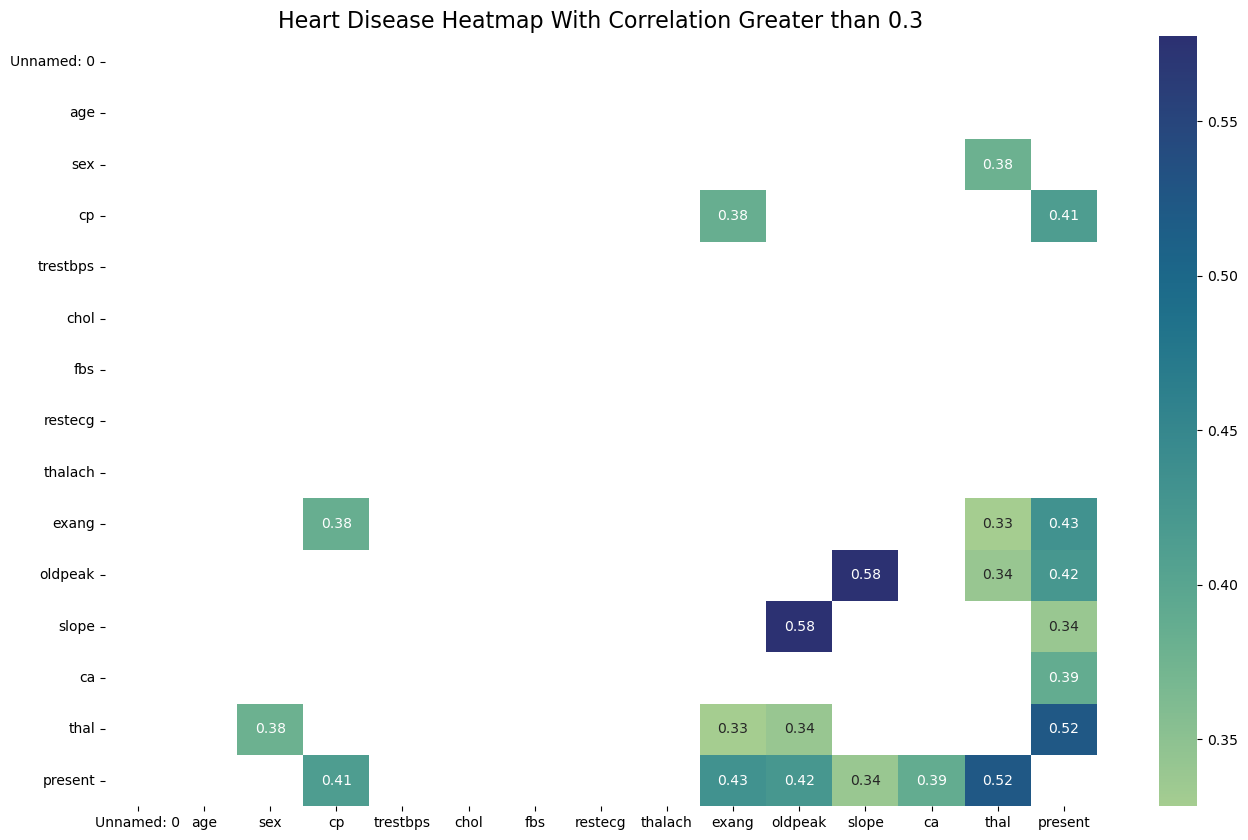

In [6]:
#Making heart copy 

heart_copy = heart.copy()

# Convert categorical variable into dummy variables
heart_copy = pd.get_dummies(heart_copy, drop_first=True)

#Plotting the correlation of categorical variables on a heat map 
heart_corr = heart_copy.corr()
fig, ax = plt.subplots(figsize=(16,10))
sns.heatmap(heart_corr, cmap="crest", annot = True)
plt.title("Heart Disease Heatmap", fontsize=16)
plt.show()

#Identifying which values are positively correlated
fig, ax = plt.subplots(figsize=(16,10))
sns.heatmap(heart_corr[(heart_corr > 0.3) & (heart_corr < 1)], cmap="crest", annot = True)
plt.title("Heart Disease Heatmap With Correlation Greater than 0.3", fontsize=16)
plt.show()

From our grouping and the heat map, here are the features that stood out that we could possibly use in our model to predict heart disease: cp, ca, exang, oldpeak, slope, and thal. 

We are now going to set up our model by splitting our data into a training and test set then checking to ensure there are cases and non-cases in each set. 

In [7]:
X = heart[['cp', 'ca', 'exang', 'oldpeak', 'slope' , 'thal']]
y = heart['present']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 1)

In [9]:
#Checking to see if both training and test datasets have cases and non-cases 
print('Y_train non-case:', sum(y_train == 0)) 
print('Y_train case:', sum(y_train == 1)) 
print('Y_test noncase:', sum(y_test == 0)) 
print('Y_test case:', sum(y_test == 1)) 

Y_train non-case: 130
Y_train case: 112
Y_test noncase: 34
Y_test case: 27


We are now going to instantiate our Logistic Regression and use a grid search in order to find the best parameters to optimize our accuracy. 

In [10]:
#Instantiate model
model = LogisticRegression()

In [11]:
#Choosing possible paramters for model
grid_params = {
    'C': [0.01, 0.1, 1, 10, 100],  # Inverse of regularization strength
    'solver': ['liblinear', 'lbfgs'],  # Different solvers
    'penalty': ['l2']  # Regularization type
}

#Instantiating GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=grid_params,
                           scoring='accuracy', cv=5, error_score='raise')

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", round(grid_search.best_score_, 2))

# Instantiating best estimator
best_model = grid_search.best_estimator_

#Finding accuracy, sensitivity, and specificity
accuracy = best_model.score(X_train, y_train)
predictions = best_model.predict(X_train)
tp = sum((predictions == 1) & (y_train == 1))
fp = sum((predictions == 1) & (y_train == 0))
tn = sum((predictions == 0) & (y_train == 0))
fn = sum((predictions == 0) & (y_train == 1))
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)

print('Training Accuracy:', round(accuracy, 2))
print('Training Sensitivity:', round(sensitivity, 2))
print('Training Specificity:', round(specificity, 2))

Best Parameters: {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}
Best Score: 0.82
Training Accuracy: 0.83
Training Sensitivity: 0.79
Training Specificity: 0.86


From first glance, it looks our training model has an accuracy of 82%. On an interesting note, it looks like our model has a higher specificity than sensitivity, which means our model can better predict whether patients do not have heart disease. 

In [12]:
# Get the coefficients
coefficients = best_model.coef_[0]

# Create a DataFrame to display coefficients alongside predictor names
predictors = X_train.columns
coef_df = pd.DataFrame({'Predictor': predictors, 'Coefficient': coefficients, 'Odds Ratio': np.exp(coefficients)})
coef_df = coef_df.sort_values(by='Coefficient', ascending=False)
coef_df['Coefficient'] = coef_df['Coefficient'].round(2)
coef_df['Odds Ratio'] = coef_df['Odds Ratio'].round(2)
print(coef_df)

  Predictor  Coefficient  Odds Ratio
2     exang         0.98        2.67
1        ca         0.69        1.98
3   oldpeak         0.64        1.89
0        cp         0.60        1.83
5      thal         0.39        1.48
4     slope         0.28        1.32


#### Interpretation of Each Predictor

1. exang (exercise induced angina):
    - Coefficient: 0.98
        - Interpretation: For each one-unit increase in exercise induced angina, the log-odds of having heart disease increase by approximately 0.98. This means that higher values of exang are associated with a greater likelihood of heart disease.
    - Odds Ratio: 2.67
        - Interpretation: For each one-unit increase in exang, the odds of having heart disease are approximately 2.67 times higher.
        
2. ca (number of major vessels):
    - Coefficient: 0.69
        - Interpretation: For each one-unit increase in the number of major vessels, the log-odds of having heart disease increase by approximately 0.69. This indicates that a higher number of major vessels is linked to a greater likelihood of heart disease.
    - Odds Ratio: 1.98
        - Interpretation: For each one-unit increase in ca, the odds of having heart disease are approximately 1.98 times higher.
        
3. oldpeak (depression induced by exercise):
    - Coefficient: 0.64
        - Interpretation: For each one-unit increase in oldpeak, the log-odds of having heart disease increase by approximately 0.64. This suggests that greater oldpeak values are associated with a higher likelihood of heart disease.
    - Odds Ratio: 1.89
        - Interpretation: For each one-unit increase in oldpeak, the odds of having heart disease are approximately 1.89 times higher.
        
4. cp (chest pain type):
    - Coefficient: 0.60
        - Interpretation: For each one-unit increase in chest pain type, the log-odds of having heart disease increase by approximately 0.60. This implies that higher values of cp are linked to a greater likelihood of heart disease.
    - Odds Ratio: 1.83
        - Interpretation: For each one-unit increase in cp, the odds of having heart disease are approximately 1.83 times higher.
        
5. thal (thalassemia):
    - Coefficient: 0.39
        - Interpretation: For each one-unit increase in thalassemia, the log-odds of having heart disease increase by approximately 0.39. This indicates that higher thal values are associated with a greater likelihood of heart disease.
    - Odds Ratio: 1.48
        - Interpretation: For each one-unit increase in thal, the odds of having heart disease are approximately 1.48 times higher.
        
6. slope (slope of the peak exercise ST segment):
    - Coefficient: 0.28
        - Interpretation: For each one-unit increase in the slope of the peak exercise ST segment, the log-odds of having heart disease increase by approximately 0.28. This suggests that higher slope values are linked to a greater likelihood of heart disease.
    - Odds Ratio: 1.32
        - Interpretation: For each one-unit increase in slope, the odds of having heart disease are approximately 1.32 times higher.

In [13]:
#Using test set 
test_accuracy = best_model.score(X_test, y_test)
test_predictions = best_model.predict(X_test)
test_tp = sum((test_predictions == 1) & (y_test == 1))
test_fp = sum((test_predictions == 1) & (y_test == 0))
test_tn = sum((test_predictions == 0) & (y_test == 0))
test_fn = sum((test_predictions == 0) & (y_test == 1))
test_sensitivity = tp / (tp + fn)
test_specificity = tn / (tn + fp)

print('Test Accuracy:', round(test_accuracy, 2))
print('Test Sensitivity:', round(test_sensitivity, 2))
print('Test Specificity:', round(test_specificity, 2))

Test Accuracy: 0.82
Test Sensitivity: 0.79
Test Specificity: 0.86


Our training and test accuracy are similar. This can mean that our model is not over fitting or underfitting and is able to generalize well to unseen data. However, it's still important to consider other metrics when considering the effectiveness of a model such as precision, AUC-ROC, etc. However, for now it's a good starting point. 

Similarly, we see that we have a higher specificity than sensitivity so we are better at predicting non-cases. This model may take a more conservative approach when predicting because giving someone a positive diagnosis incorrectly can lead to more expensive interventions for patients. However, on the flip side if we are incorrectly predicting negative cases where a patient does have heart disease it could lead to delayed treatment. 

So we can use this model as a pilot to start intevening in patient care for patients who may have heart disease but keep tuning our model as we collect more data. We can using different features in our next iterations as well as collect more patient samples to improve out future model.